# Fruit classification

## Apple, Banana, Orange

## Train, Valid, Test

## ~70%/15%/15%

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator

2023-10-18 21:42:38.846006: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# 1, Training
## Define base model

Input shape 64x64x3, dense, dense, dense

In [2]:
num_classes = 3

model = Sequential([
    Flatten(input_shape=(64, 64, 3)),
    Dense(512, activation='relu', input_shape=(64,)),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 12288)             0         
                                                                 
 dense (Dense)               (None, 512)               6291968   
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 6,556,163
Trainable params: 6,556,163
Non-trainable params: 0
_________________________________________________________________


## Define train/valid directory and images (64x64)

In [3]:
TRAINING_DIR = "data/fruitdata/train"
train_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=10, 
                                                    target_size=(64, 64))

VALIDATION_DIR = "data/fruitdata/valid"
validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=10, 
                                                         target_size=(64, 64)) 

Found 464 images belonging to 3 classes.
Found 96 images belonging to 3 classes.


## Train and save the model

In [4]:
history = model.fit(train_generator,
                    epochs=5,
                    validation_data=validation_generator)
model.save("fruit.h5")

Epoch 1/5


2023-10-18 21:42:43.650346: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - ETA: 0s - loss: 4.0634 - acc: 0.5043

2023-10-18 21:42:49.316604: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - 6s 109ms/step - loss: 4.0634 - acc: 0.5043 - val_loss: 0.4195 - val_acc: 0.8958
Epoch 2/5
47/47 [==============================] - 5s 96ms/step - loss: 0.6991 - acc: 0.7392 - val_loss: 0.3551 - val_acc: 0.8854
Epoch 3/5
47/47 [==============================] - 4s 88ms/step - loss: 0.5026 - acc: 0.8039 - val_loss: 0.2635 - val_acc: 0.9062
Epoch 4/5
47/47 [==============================] - 5s 112ms/step - loss: 0.3719 - acc: 0.8513 - val_loss: 0.2977 - val_acc: 0.8333
Epoch 5/5
47/47 [==============================] - 4s 92ms/step - loss: 0.4987 - acc: 0.8254 - val_loss: 0.4767 - val_acc: 0.7812


## See the training accuracy/loss

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


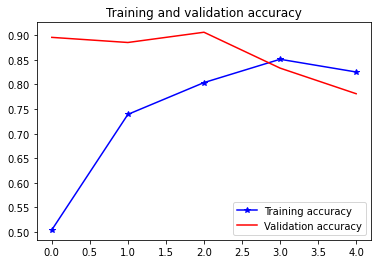

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

print(history.history.keys())
epochs=5

val_acc = history.history['val_acc']
val_loss = history.history['val_loss']
acc = history.history['acc']
loss = history.history['loss']

plt.plot(range(epochs), acc, 'b*-', label = 'Training accuracy')
plt.plot(range(epochs), val_acc, 'r', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

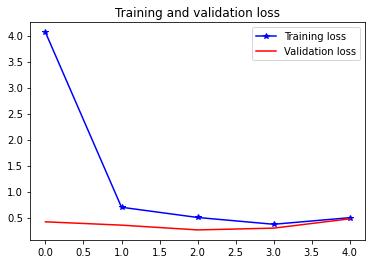

In [6]:
plt.plot(range(epochs), loss, 'b*-', label = 'Training loss')
plt.plot(range(epochs), val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

# 2, Inference

## First, load the trained model, then image to predict

1/1 [==============================] - 0s 110ms/step


array([[1., 0., 0.]], dtype=float32)

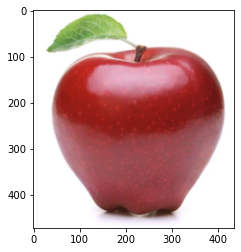

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow import keras

model = keras.models.load_model('fruit.h5')

image_path = 'data/fruitdata/test/Apple/1.png'

image = mpimg.imread(image_path)
plt.imshow(image)

def make_prediction(image_path):
    image = image_utils.load_img(image_path, target_size=(64, 64))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,64,64,3)
    image = preprocess_input(image)
    preds = model.predict(image)
    return preds

make_prediction('data/fruitdata/test/Apple/1.png')

## It's better to define the mapping for index/name

In [8]:
import numpy as np

image_mapping = {0: 'Apple', 1: 'Banana', 2: 'Orange'}
    
print(image_mapping[np.argmax(make_prediction('data/fruitdata/test/Apple/1.png'))])

1/1 [==============================] - 0s 24ms/step
Apple


## Run the model inference for "test" dataset

In [9]:
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_it = test_datagen.flow_from_directory('data/fruitdata/test/', 
                                       target_size=(64, 64), 
                                       batch_size=1, 
                                       shuffle=False,
                                       class_mode="categorical")

pred_output = model.predict(test_it)
print(pred_output)
pred_output = np.argmax(pred_output, axis=1)
print(pred_output)

Found 96 images belonging to 3 classes.


19/96 [====>.........................] - ETA: 0s

2023-10-18 21:43:16.588874: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


96/96 [==============================] - 1s 6ms/step
[[9.99266326e-01 1.58384035e-04 5.75249724e-04]
 [9.96913075e-01 6.63265673e-05 3.02059972e-03]
 [9.64998126e-01 3.93089984e-04 3.46088260e-02]
 [9.95017469e-01 4.05718565e-05 4.94203251e-03]
 [9.87465143e-01 7.85433222e-05 1.24563230e-02]
 [9.95510221e-01 1.06315420e-03 3.42664798e-03]
 [9.98255789e-01 6.37391058e-04 1.10677653e-03]
 [9.98752475e-01 5.19300229e-04 7.28201936e-04]
 [9.99503255e-01 4.03744089e-05 4.56353358e-04]
 [9.95371163e-01 2.67267111e-03 1.95622141e-03]
 [9.71281648e-01 3.53260490e-04 2.83651054e-02]
 [9.98725474e-01 6.33843592e-05 1.21117663e-03]
 [9.98743832e-01 4.30366403e-04 8.25744530e-04]
 [9.92536545e-01 6.16782636e-04 6.84665004e-03]
 [9.82327223e-01 8.16067588e-03 9.51216090e-03]
 [9.97151673e-01 6.52382907e-04 2.19602976e-03]
 [9.98542547e-01 1.04157785e-04 1.35332509e-03]
 [9.97129261e-01 2.46763485e-03 4.03091806e-04]
 [8.50736320e-01 5.26519641e-02 9.66117233e-02]
 [9.28346634e-01 7.15377107e-02 1.1

## See the classification report

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_it.classes, pred_output))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82        32
           1       0.96      0.78      0.86        32
           2       1.00      0.75      0.86        32

    accuracy                           0.84        96
   macro avg       0.89      0.84      0.85        96
weighted avg       0.89      0.84      0.85        96



## See the confusion matrix

Text(0.5, 1.0, 'Confusion matrix of model')

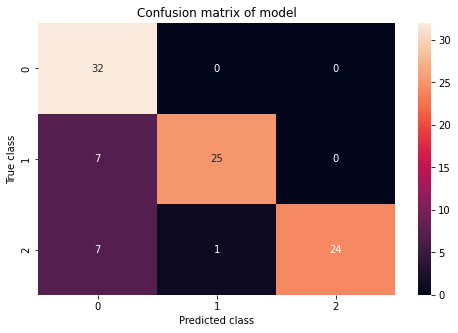

In [11]:
cf_matrix = confusion_matrix(test_it.classes, pred_output)

plt.figure(figsize=(8,5))
heatmap = sns.heatmap(cf_matrix, annot=True, fmt='d', color='blue')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion matrix of model')

# CNN Construction

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=256, activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=num_classes, activation="softmax"))

In [ ]:
model.summary()

In [ ]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.fit(x_train, y_train, epochs=20, verbose=1, validation_data=(x_valid, y_valid))